# MLP Model Analysis

In [1]:
import os
# need to reload kernel between runs of this
os.chdir('genre_classification_289a/src')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_utils import find_available_mlp_models, get_mlp_f1s, get_mlp_loss_histories, abbrev_targets, get_stn_f1s

## Available MLP Models

In [3]:
# set possible file attrs
dataset_name = "fma_medium"
possible_targets = ["subgenres", "mfcc", "genre"]
possible_layers = [7,6,5,4]
save_plots_path = os.path.join(os.path.curdir, "../models/analysis-plots/")

mlp_models = find_available_mlp_models(dataset_name, possible_targets, possible_layers)
for model in mlp_models:
    print(model)

{'dataset': 'fma_medium', 'targets': ['mfcc'], 'layer': 7}
{'dataset': 'fma_medium', 'targets': ['mfcc'], 'layer': 6}
{'dataset': 'fma_medium', 'targets': ['mfcc'], 'layer': 5}
{'dataset': 'fma_medium', 'targets': ['subgenres'], 'layer': 7}
{'dataset': 'fma_medium', 'targets': ['subgenres'], 'layer': 6}
{'dataset': 'fma_medium', 'targets': ['subgenres'], 'layer': 5}
{'dataset': 'fma_medium', 'targets': ['subgenres', 'mfcc', 'genre'], 'layer': 7}
{'dataset': 'fma_medium', 'targets': ['subgenres', 'mfcc', 'genre'], 'layer': 6}
{'dataset': 'fma_medium', 'targets': ['subgenres', 'mfcc', 'genre'], 'layer': 5}
{'dataset': 'fma_medium', 'targets': ['subgenres', 'mfcc', 'genre'], 'layer': 4}


## Table of F1 (micro) Performance

In [4]:
mlp_f1s = get_mlp_f1s(mlp_models)

for idx, f1 in enumerate(mlp_f1s):
    print(f"{f1.round(4)} <= layer: {mlp_models[idx]['layer']}, targets: {mlp_models[idx]['targets']}")

0.6525 <= layer: 7, targets: ['mfcc']
0.7562 <= layer: 6, targets: ['mfcc']
0.6799 <= layer: 5, targets: ['mfcc']
0.8602 <= layer: 7, targets: ['subgenres']
0.8802 <= layer: 6, targets: ['subgenres']
0.7275 <= layer: 5, targets: ['subgenres']
0.9747 <= layer: 7, targets: ['subgenres', 'mfcc', 'genre']
0.9611 <= layer: 6, targets: ['subgenres', 'mfcc', 'genre']
0.7905 <= layer: 5, targets: ['subgenres', 'mfcc', 'genre']
0.6721 <= layer: 4, targets: ['subgenres', 'mfcc', 'genre']


## Plots of Losses

In [5]:
mlp_loss_histories = get_mlp_loss_histories(mlp_models)
batch_set_size = 30

### Regular Loss Plot

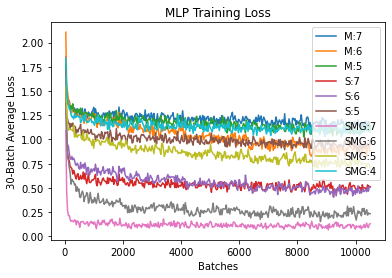

In [6]:
# regular plot
plt.figure()
plt.title("MLP Training Loss")
for idx, mlp_loss_history in enumerate(mlp_loss_histories):
    label = f"{abbrev_targets(mlp_models[idx]['targets'])}:{mlp_models[idx]['layer']}"
    plt.plot((np.arange(len(mlp_loss_history))+1)*batch_set_size, mlp_loss_history, label=label)
plt.ylabel(f"{batch_set_size}-Batch Average Loss")
plt.xlabel("Batches")
plt.legend()
plt.savefig(os.path.join(save_plots_path, f"MLP-training-losses.png"))


plt.show()

### Smoothed Loss Plot

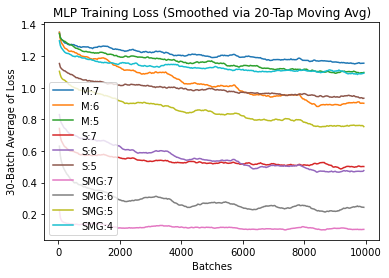

In [7]:
# smoother plot (average every 8 sets of 30 batch loss averages)
n_avg = 20 # moving average filter order

plt.figure()
plt.title(f"MLP Training Loss (Smoothed via {n_avg}-Tap Moving Avg)")

# stack @Jaime
def moving_average(a, n) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

for idx, mlp_loss_history in enumerate(mlp_loss_histories):
    # V2 Smooth (moving average, much better metric)
    losses = np.array(mlp_loss_history)
    losses_avg = moving_average(losses, n_avg)
    label = f"{abbrev_targets(mlp_models[idx]['targets'])}:{mlp_models[idx]['layer']}"
    plt.plot((np.arange(len(losses_avg))+1)*batch_set_size, losses_avg, label=label)
plt.ylabel(f"{batch_set_size}-Batch Average of Loss")
plt.xlabel("Batches")
plt.legend()
plt.savefig(os.path.join(save_plots_path, f"MLP-training-losses-smooth-{n_avg}.png"))

# STN Model Analysis

In [8]:
# only have a few STNs to load in
stn_models = [
    {
        'dataset': 'fma_medium',
        'target': 'subgenres',
    },
    {
        'dataset': 'fma_medium',
        'target': 'genre',
    },
    {
        'dataset': 'fma_medium',
        'target': 'mfcc',
    }
]

## Table of F1 (micro) Performance

In [9]:
stn_f1s = get_stn_f1s(stn_models)

for idx, f1 in enumerate(stn_f1s):
    print(f"{f1.round(4)} <= target: {stn_models[idx]['target']}")

0.774 <= target: subgenres
0.9698 <= target: genre
0.8393 <= target: mfcc
